In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [2]:
df = pd.read_csv('../data/PAGOV.csv')

In [3]:
df.head()

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,...,Revive Action Desc,Third Party Admin Desc,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude
0,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
1,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
2,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
3,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
4,26,1/26/2018,9:14:00,Friday,Chester,Pennsylvania,5,Male,25 - 29,White,...,NaN,NaN,29,39.974871,-75.756265,29.0,39.974871,-75.756265,"(39.974871, -75.756265)","(39.974871, -75.756265)"


In [4]:
opiod_list = ['CARFENTANIL','FENTANYL','FENTANYL ANALOG/OTHER SYNTHETIC OPIOID','HEROIN','METHADONE','PHARMACEUTICAL OPIOID','SUBOXONE']

In [5]:
opdf = df.loc[df['Susp OD Drug Desc'].isin(opiod_list)]
opdf = opdf[['Incident ID','Incident Date','Victim ID','Gender Desc','Naloxone Administered','Age Range','Survive','Response Desc']]
opdf = opdf.drop_duplicates()

In [6]:
opdf['Incident Date ym'] = pd.to_datetime(opdf['Incident Date']).dt.to_period('M')

In [7]:
oppdf = opdf.groupby(['Incident Date ym'])[['Incident ID']].count().reset_index()

In [8]:
oppdf.head()

,Incident Date ym,Incident ID
0,2018-01,163
1,2018-02,162
2,2018-03,384
3,2018-04,432
4,2018-05,479


In [9]:
def yn_switch(df):
    for i, row in df.iterrows():
        if row['Naloxone Administered'] == 'Y':
            df.loc[i,'Narcan Admin'] = 1
        else:
            df.loc[i,'Narcan Admin'] = 0
            
        if row['Survive'] =='Y':
            df.loc[i,'surv'] = 1
        else:
            df.loc[i,'surv'] = 0
            
    return(df)    
        

In [10]:
opdfnew = yn_switch(opdf)

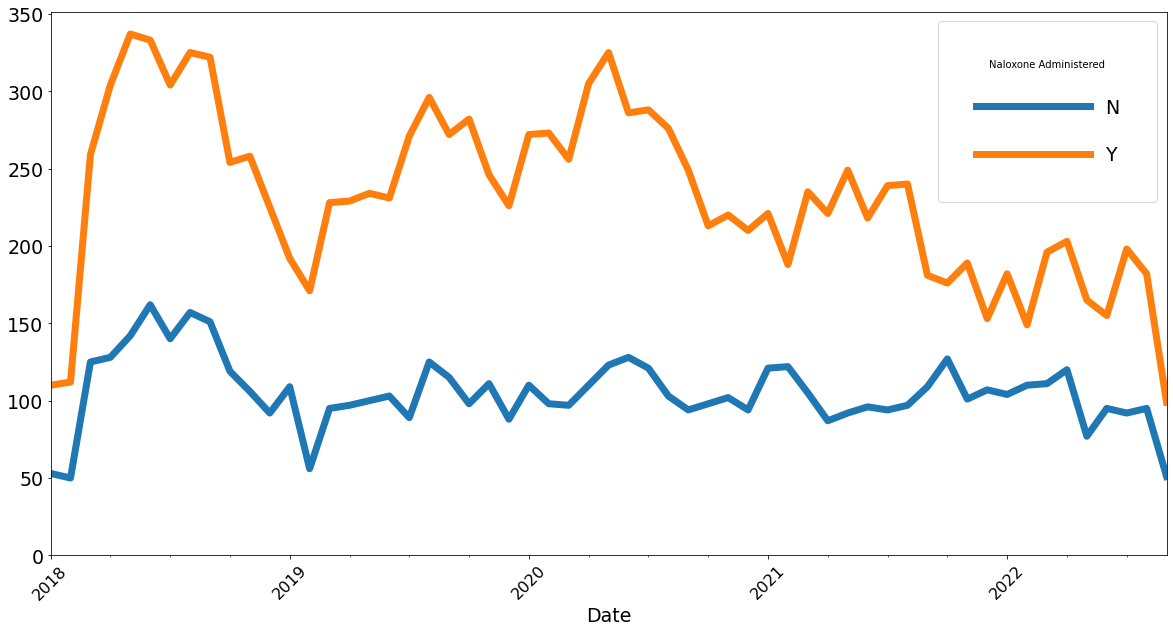

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
#plt.xticks(rotation=45)
opdfnew.groupby(['Incident Date ym', 'Naloxone Administered'])['Incident ID'].count().unstack().plot.line(linewidth=7.0)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=19)
#ax.set_ylim(ymin=0)
plt.xlabel(xlabel = 'Date', fontsize=19)
plt.ylim(0)
plt.legend(borderpad=2, labelspacing=1.5,handlelength=6,fontsize = 19, title = 'Naloxone Administered')
plt.show()

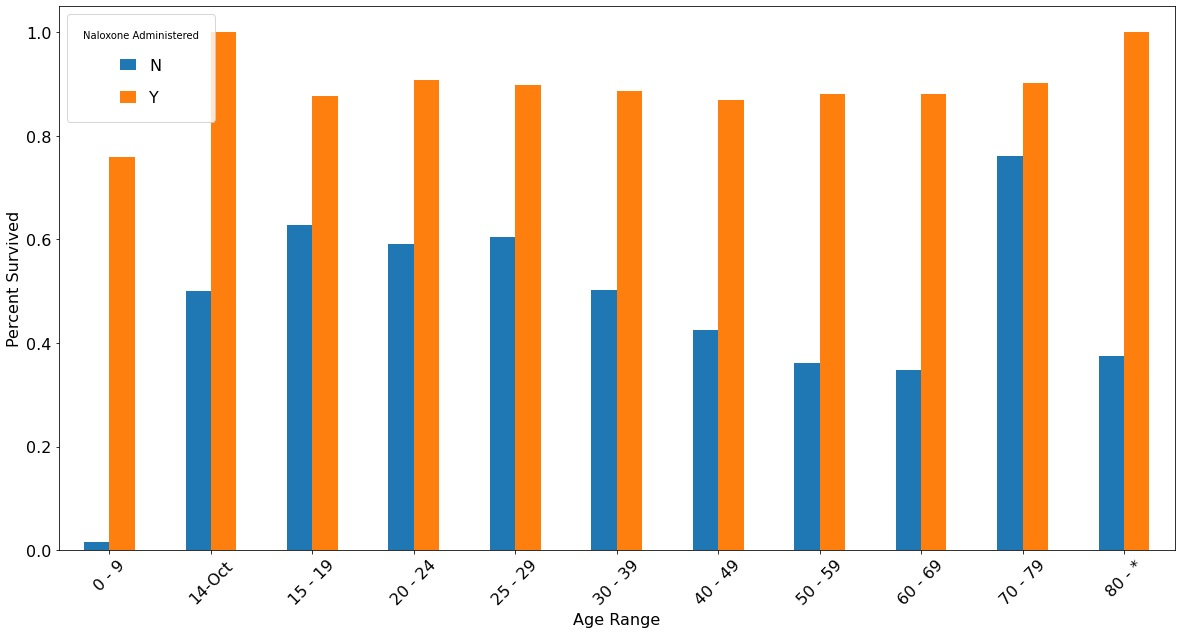

In [12]:
### Plotting a line chart time series try

plt.rcParams["figure.figsize"] = (20,10)
#plt.xticks(rotation=45)
opdfnew.groupby(['Age Range', 'Naloxone Administered'])['surv'].mean().unstack().plot.bar(fontsize=16)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'Age Range', fontsize=16)
plt.ylabel(ylabel = 'Percent Survived', fontsize=16)
plt.legend(borderpad=1, labelspacing=1.1,handlelength=1,fontsize = 16, title = 'Naloxone Administered')
plt.show()